In [1]:
import csv
import sys
import collections
import os.path
import requests

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline


# on exit clean-ups
import atexit

# cassandra libs
from cassandra.cluster import Cluster
from cassandra.query import dict_factory


# neo4j libs
from py2neo import Graph
from py2neo import Node, Relationship

# neo4j graph connector
graph = Graph()
# delete entire graph


# bool flag database connections
cassandraDbOn=False
neo4jDbOn=False

def dbCleanUP(cassandraDbOn,neo4jDbOn):
    if cassandraDbOn:
    	print 'cleaning Cassandra state'
    	session.shutdown();
    	cluster.shutdown();

atexit.register(dbCleanUP,True,True)

# # read-csv learner proficiency table
# read_file = './data/CassandraLearnerProficiency.csv'

# # first pass to get the list of students and graders
# with open(read_file,'rb') as grade_file:
# 	for line in grade_file:
# 		line = line.rstrip()
# 		names = line.split(',')
		
# for name in names:
# 	print(name)


# setup cassandra connection
cassandraDbOn=True
cluster = Cluster()
session = cluster.connect('learner_db')

# set response schema to Dictionaries
session.row_factory = dict_factory

# # create a connection to neo4js
# graph = Graph()
# # delete entire graph
# graph.delete_all()

# # set uniqueness constraints
# # Concept needs to have a unique id
# graph.schema.create_uniqueness_constraint("Concept", "id")
# # Learner needs to have a unique id
# graph.schema.create_uniqueness_constraint("Learner", "id")
# # Content needs to have a unique id
# graph.schema.create_uniqueness_constraint("Content", "id")

uid = 'bec93d0e-1e11-4d5f-a5ee-ac46123c75ea'

# plot relevency scores
# connect to content summary tables and get the timeSpent
relDict = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y = relDict.values()

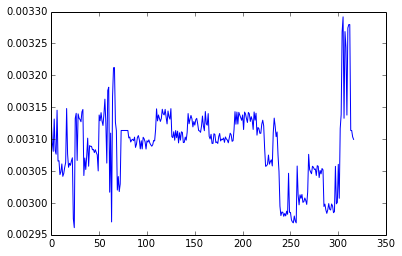

In [2]:
plt.plot(y)

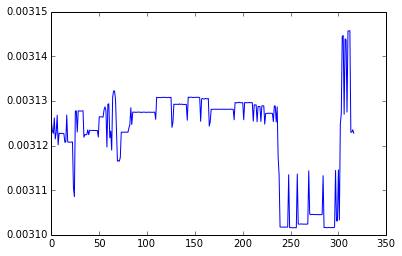

In [3]:
relDict2 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y2 = relDict2.values()
plt.plot(y2)

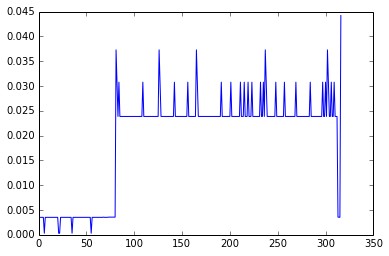

In [5]:
relDict2 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y2 = relDict2.values()
plt.plot(y2)

In [12]:
conDict = session.execute("SELECT time_spent from learnercontentsummary WHERE learner_id='" + uid + "'")

In [31]:
sorted(relDict2.items(), key=lambda x: x[1],reverse=True)[:10]

[(u'numeracy', 0.044200427129714885),
 (u'Num:C1', 0.03728485407278752),
 (u'Num:C2', 0.03728485407278752),
 (u'Num:C3', 0.03728485407278752),
 (u'Num:C4', 0.03728485407278752),
 (u'Num:C5', 0.03728485407278752),
 (u'Num:C1:SC1', 0.03077607943097353),
 (u'Num:C1:SC2', 0.03077607943097353),
 (u'Num:C1:SC3', 0.03077607943097353),
 (u'Num:C2:SC1', 0.03077607943097353)]

In [30]:
print(conDict[])

{u'time_spent': 763.0}


In [45]:
lids = session.execute("SELECT DISTINCT learner_id from learnerconceptrelevance")

learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'numeracy', 0.20303415514500772), (u'Num:C1', 0.1961185258227394), (u'Num:C2', 0.1961185258227394), (u'Num:C3', 0.1961185258227394), (u'Num:C4', 0.1961185258227394), (u'Num:C5', 0.1961185258227394), (u'Num:C1:SC1', 0.18960969822531037), (u'Num:C1:SC2', 0.18960969822531037), (u'Num:C1:SC3', 0.18960969822531037), (u'Num:C2:SC1', 0.18960969822531037)]
bottom 10 recommended concepts are:
[(u'LO1', 0.0015822784810126645), (u'LO24', 0.0015822784810126645), (u'LO25', 0.0015822784810126645), (u'LO37', 0.0015822784810126645), (u'LO6', 0.0015822784810126645), (u'LD1', 0.1623539826610764), (u'LD2', 0.1623539826610764), (u'LD3', 0.1623539826610764), (u'LD4', 0.1623539826610764), (u'LD5', 0.1623539826610764)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.94), (u'Num:C3:SC2:MC5', 0.88), (u'Num:C4:SC5:MC9', 0.88)]
bottom concepts:
[(u'Num:C3:SC2:MC5', 0.88), (u'Num:C4:SC5:MC9', 0.88), (u'Num:C4:SC4:M

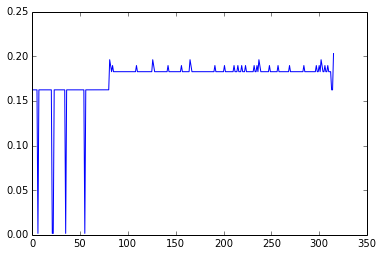

In [85]:
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'numeracy', 0.04236202476002837), (u'Num:C1', 0.03544639543776005), (u'Num:C2', 0.03544639543776005), (u'Num:C3', 0.03544639543776005), (u'Num:C4', 0.03544639543776005), (u'Num:C5', 0.03544639543776005), (u'Num:C1:SC1', 0.028937567840331035), (u'Num:C1:SC2', 0.028937567840331035), (u'Num:C1:SC3', 0.028937567840331035), (u'Num:C2:SC1', 0.028937567840331035)]
bottom 10 recommended concepts are:
[(u'LO1', 0.0001506931886678728), (u'LO24', 0.0001506931886678728), (u'LO25', 0.0001506931886678728), (u'LO37', 0.0001506931886678728), (u'LO6', 0.0001506931886678728), (u'LD1', 0.0016818522760970512), (u'LD2', 0.0016818522760970512), (u'LD3', 0.0016818522760970512), (u'LD4', 0.0016818522760970512), (u'LD5', 0.0016818522760970512)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.94), (u'Num:C3:SC2:MC5', 0.89), (u'Num:C4:SC5:MC9', 0.89)]
bottom concepts:
[(u'Num:C3:SC2:MC5', 0.89), (u'Num:C4:SC5:MC9'

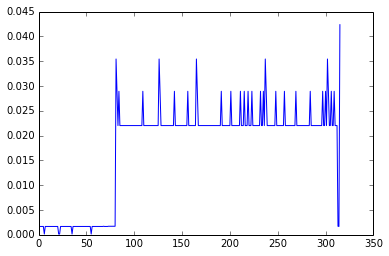

In [86]:
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'LD1', 0.0032051282051282193), (u'LD2', 0.0032051282051282193), (u'LD3', 0.0032051282051282193), (u'LD4', 0.0032051282051282193), (u'LD5', 0.0032051282051282193), (u'LD6', 0.0032051282051282193), (u'LO10', 0.0032051282051282193), (u'LO11', 0.0032051282051282193), (u'LO12', 0.0032051282051282193), (u'LO13', 0.0032051282051282193)]
bottom 10 recommended concepts are:
[(u'LO1', 0.0), (u'LO24', 0.0), (u'LO25', 0.0), (u'LO37', 0.0), (u'LO6', 0.0), (u'LD1', 0.0032051282051282193), (u'LD2', 0.0032051282051282193), (u'LD3', 0.0032051282051282193), (u'LD4', 0.0032051282051282193), (u'LD5', 0.0032051282051282193)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.71), (u'Num:C3:SC2:MC5', 0.6), (u'Num:C4:SC5:MC9', 0.6)]
bottom concepts:
[(u'Num:C3:SC2:MC5', 0.6), (u'Num:C4:SC5:MC9', 0.6), (u'Num:C4:SC4:MC11', 0.71)]


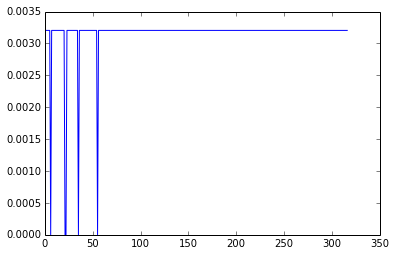

In [87]:
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

In [88]:
print("with KS 1.0 above")

with KS 5.0 above


with timeSpent 1.0 below
learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'LD1', 0.0031545741324921256), (u'LD2', 0.0031545741324921256), (u'LD3', 0.0031545741324921256), (u'LD4', 0.0031545741324921256), (u'LD5', 0.0031545741324921256), (u'LD6', 0.0031545741324921256), (u'LO1', 0.0031545741324921256), (u'LO10', 0.0031545741324921256), (u'LO11', 0.0031545741324921256), (u'LO12', 0.0031545741324921256)]
bottom 10 recommended concepts are:
[(u'LD1', 0.0031545741324921256), (u'LD2', 0.0031545741324921256), (u'LD3', 0.0031545741324921256), (u'LD4', 0.0031545741324921256), (u'LD5', 0.0031545741324921256), (u'LD6', 0.0031545741324921256), (u'LO1', 0.0031545741324921256), (u'LO10', 0.0031545741324921256), (u'LO11', 0.0031545741324921256), (u'LO12', 0.0031545741324921256)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.71), (u'Num:C3:SC2:MC5', 0.6), (u'Num:C4:SC5:MC9', 0.6)]
bottom concepts:
[(u'Num:C3:SC2:MC5', 0.6), (u'Num:C4:SC5:MC9', 0.6),

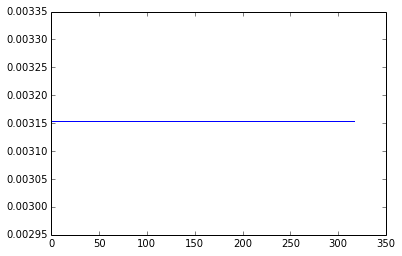

In [89]:
print("with timeSpent 1.0 below")
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

KS,P,TS: 1,1,0 below
learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'numeracy', 0.009738532404831598), (u'Num:C1', 0.008355417793446125), (u'Num:C2', 0.008355417793446125), (u'Num:C3', 0.008355417793446125), (u'Num:C4', 0.008355417793446125), (u'Num:C5', 0.008355417793446125), (u'Num:C1:SC1', 0.007053662865083328), (u'Num:C1:SC2', 0.007053662865083328), (u'Num:C1:SC3', 0.007053662865083328), (u'Num:C2:SC1', 0.007053662865083328)]
bottom 10 recommended concepts are:
[(u'LO1', 0.0), (u'LO24', 0.0), (u'LO25', 0.0), (u'LO37', 0.0), (u'LO6', 0.0), (u'LD1', 0.0016025641025641097), (u'LD2', 0.0016025641025641097), (u'LD3', 0.0016025641025641097), (u'LD4', 0.0016025641025641097), (u'LD5', 0.0016025641025641097)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.71), (u'Num:C3:SC2:MC5', 0.6), (u'Num:C4:SC5:MC9', 0.6)]
bottom concepts:
[(u'Num:C3:SC2:MC5', 0.6), (u'Num:C4:SC5:MC9', 0.6), (u'Num:C4:SC4:MC11', 0.71)]


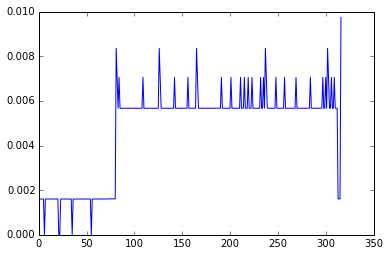

In [90]:
print("KS,P,TS: 1,1,0 below")
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

KS,P,TS: 0,0,0 below, TSP is derived from concept-proficiency table
learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'Num:C3:SC2:MC5', 0.25059288537549435), (u'Num:C4:SC4:MC11', 0.25059288537549435), (u'Num:C4:SC5:MC9', 0.25059288537549435), (u'LD1', 0.0007905138339920957), (u'LD2', 0.0007905138339920957), (u'LD3', 0.0007905138339920957), (u'LD4', 0.0007905138339920957), (u'LD5', 0.0007905138339920957), (u'LD6', 0.0007905138339920957), (u'LO1', 0.0007905138339920957)]
bottom 10 recommended concepts are:
[(u'LD1', 0.0007905138339920957), (u'LD2', 0.0007905138339920957), (u'LD3', 0.0007905138339920957), (u'LD4', 0.0007905138339920957), (u'LD5', 0.0007905138339920957), (u'LD6', 0.0007905138339920957), (u'LO1', 0.0007905138339920957), (u'LO10', 0.0007905138339920957), (u'LO11', 0.0007905138339920957), (u'LO12', 0.0007905138339920957)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.71), (u'Num:C3:SC2:MC5', 0.6), (u'Num:C4:SC5:MC9', 0.6)]
b

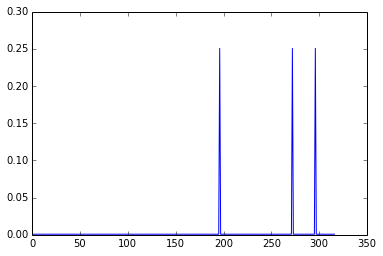

In [98]:
print("KS,P,TS: 0,0,1 below, TSP is derived from concept-proficiency table")
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table
learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'Num:C4:SC4:MC11', 0.18458985177440232), (u'Num:C3:SC2:MC5', 0.15630691891311405), (u'Num:C4:SC5:MC9', 0.15630691891311405), (u'numeracy', 0.004092171128584187), (u'Num:C1', 0.0034017645006047506), (u'Num:C2', 0.0034017645006047506), (u'Num:C3', 0.0034017645006047506), (u'Num:C4', 0.0034017645006047506), (u'Num:C5', 0.0034017645006047506), (u'Num:C1:SC1', 0.002751970027212342)]
bottom 10 recommended concepts are:
[(u'LD1', 3.0955669881625096e-05), (u'LD2', 3.0955669881625096e-05), (u'LD3', 3.0955669881625096e-05), (u'LD4', 3.0955669881625096e-05), (u'LD5', 3.0955669881625096e-05), (u'LD6', 3.0955669881625096e-05), (u'LO1', 3.0955669881625096e-05), (u'LO10', 3.0955669881625096e-05), (u'LO11', 3.0955669881625096e-05), (u'LO12', 3.0955669881625096e-05)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.71), (u'Num:C3:SC2:MC5'

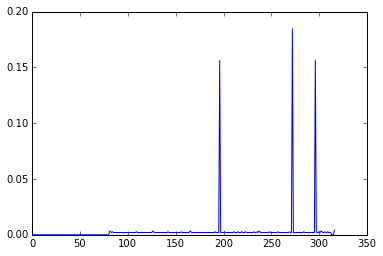

In [107]:
print("KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table")
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table
learner is:bec93d0e-1e11-4d5f-a5ee-ac46123c75ea
concept relevancy scores:
top 10 recommended concepts are:
[(u'Num:C4:SC4:MC11', 0.1104154549749203), (u'Num:C2:SC1:MC2', 0.09759855717686343), (u'Num:C3:SC2:MC5', 0.09759855717686343), (u'Num:C4:SC4:MC1', 0.08478165937880654), (u'Num:C4:SC5:MC9', 0.08478165937880654), (u'Num:C2:SC2:MC8', 0.06497372641817319), (u'numeracy', 0.003750898706521824), (u'Num:C1', 0.003122210246801154), (u'Num:C2', 0.003122210246801154), (u'Num:C3', 0.003122210246801154)]
bottom 10 recommended concepts are:
[(u'LD1', 5.273129640023824e-05), (u'LD2', 5.273129640023824e-05), (u'LD3', 5.273129640023824e-05), (u'LD4', 5.273129640023824e-05), (u'LD5', 5.273129640023824e-05), (u'LD6', 5.273129640023824e-05), (u'LO1', 5.273129640023824e-05), (u'LO10', 5.273129640023824e-05), (u'LO11', 5.273129640023824e-05), (u'LO12', 5.273129640023824e-05)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.82), (u'Num:C2:SC1:MC2

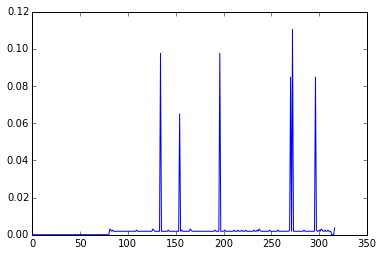

In [102]:
print("KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table")
uid=(lids[1]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

KS,P,TS: 300,300,1 below, TSP is derived from concept-proficiency table
learner is:24fc1b99-852b-4427-803b-c6179dd93d9d
concept relevancy scores:
top 10 recommended concepts are:
[(u'numeracy', 0.014550477230204022), (u'Num:C3', 0.012751711407475197), (u'Num:C4', 0.012474141279003264), (u'Num:C1', 0.011674728428470168), (u'Num:C2', 0.011432828782213461), (u'Num:C5', 0.010305161554686403), (u'Num:C3:SC1', 0.009216161134499077), (u'Num:C3:SC2', 0.008630555361020429), (u'Num:C3:SC3', 0.008630555361020427), (u'Num:C3:SC7', 0.00859151377859921)]
bottom 10 recommended concepts are:
[(u'LO26', 6.108052678090144e-06), (u'LO27', 6.974414798894734e-06), (u'LT05', 1.0856118094735023e-05), (u'LT01', 1.1077088065833967e-05), (u'LT02', 1.1077088065833967e-05), (u'LT03', 1.1920869458199555e-05), (u'LT04', 1.1920869458199555e-05), (u'LT06', 1.235839477116696e-05), (u'LT09', 1.235839477116696e-05), (u'LT07', 1.2585633009344895e-05)]
top concepts:
[(u'Num:C2:SC2:MC7', 0.87), (u'Num:C2:SC1:MC10', 0.75), 

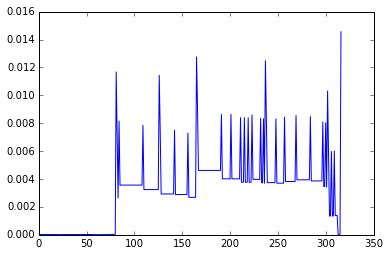

In [120]:
print("KS,P,TS: 300,300,1 below, TSP is derived from concept-proficiency table")
uid=(lids[100]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

KS,P,TS: 300,300,1 below, TSP is derived from concept-proficiency table
learner is:24fc1b99-852b-4427-803b-c6179dd93d9d
concept relevancy scores:
top 10 recommended concepts are:
[(u'LD1', 0.003155915594966587), (u'LD2', 0.003155915594966587), (u'LD3', 0.003155915594966587), (u'LD4', 0.003155915594966587), (u'LD5', 0.003155915594966587), (u'LD6', 0.003155915594966587), (u'LO1', 0.003155915594966587), (u'LO10', 0.003155915594966587), (u'LO11', 0.003155915594966587), (u'LO12', 0.003155915594966587)]
bottom 10 recommended concepts are:
[(u'Num:C2:SC2:MC7', 0.003086239489821118), (u'Num:C2:SC1:MC10', 0.0030876016837420093), (u'Num:C3:SC2:MC5', 0.0030912860417877217), (u'Num:C4:SC5:MC9', 0.0030912860417877217), (u'Num:C2:SC2:MC8', 0.0030947462383001385), (u'Num:C2:SC1:MC2', 0.0031016005214188364), (u'Num:C4:SC4:MC11', 0.0031134055435473496), (u'LD1', 0.003155915594966587), (u'LD2', 0.003155915594966587), (u'LD3', 0.003155915594966587)]
top concepts:
[(u'Num:C2:SC2:MC7', 0.87), (u'Num:C2:SC1

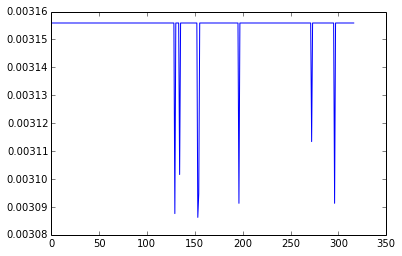

In [125]:
print("KS,P,TS: 300,300,1 below, TSP is derived from concept-proficiency table")
uid=(lids[100]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

-- above--- only KS
KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table
learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'numeracy', 0.00604500568771538), (u'Num:C3', 0.005429699236286332), (u'Num:C4', 0.005418472173282595), (u'Num:C1', 0.005270164706886277), (u'Num:C2', 0.005269088410961812), (u'Num:C5', 0.004963261520425749), (u'Num:C3:SC1', 0.004413219949780114), (u'Num:C4:SC4', 0.004331117495979421), (u'Num:C4:SC5', 0.004312701567917381), (u'Num:C1:SC2', 0.004311310741702151)]
bottom 10 recommended concepts are:
[(u'LT1', 0.002137585121142295), (u'LT2', 0.002137585121142295), (u'LT3', 0.002137585121142295), (u'LT4', 0.002137585121142295), (u'LT5', 0.002137585121142295), (u'LT6', 0.002137585121142295), (u'LT7', 0.002137585121142295), (u'LT8', 0.002137585121142295), (u'LT9', 0.002137585121142295), (u'concept_Live', 0.002137585121142295)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.71), (u'Num:C3:SC2:MC5', 0.6), (u

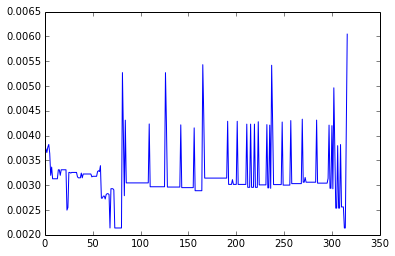

In [145]:
print("-- above--- only KS")
print("KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table")
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])

In [130]:
lids = session.execute("SELECT DISTINCT learner_id from learnerconceptrelevance")
print(lids[0]['learner_id'])


d6f75cff-03ea-43c3-a1d0-02ccc0901c8d


In [132]:
import numpy as np
np.percentile(relDict3.values(),5)

0.0025486553605213757

In [138]:
y3=relDict3.values()
round(sorted(y3)[len(y3)-10]*1e4)/1e4

0.0043

In [144]:
sorted([1,-2,3],reverse=True)[0]

3